In [ ]:
from google.colab import drive
from math import pi
import numpy as np
from scipy import interpolate 
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [ ]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


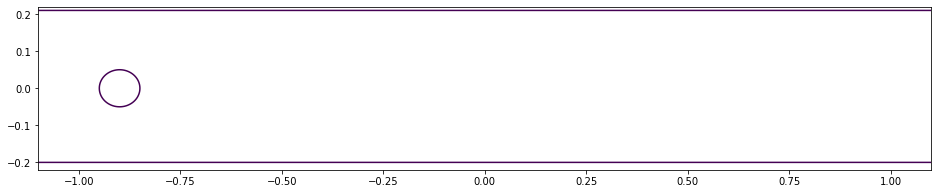

In [ ]:
N = [1024,1024]
x = np.linspace(-1.1, 1.1, N[0]+1)
y = np.linspace(-0.22,0.22,N[1]+1)
x_dom,y_dom = np.meshgrid(x,y)

# level-set function for the cylinder and the wind-tunnel walls
phi = np.zeros_like(x_dom)
for i in range(N[0]+1):
    for j in range(N[1]+1):
        if   y_dom[i,j] > 0 and (0.21-y_dom[i,j]) < 0.05:
            phi[i,j] = -0.205+np.sqrt((y_dom[i,j]-0.005)**2)
        elif y_dom[i,j] < 0 and (0.20+y_dom[i,j]) < 0.05:
            phi[i,j] = -0.205+np.sqrt((y_dom[i,j]-0.005)**2)
        elif np.abs(y_dom[i,j]) < 0.15:
            phi[i,j] = 0.05 - np.sqrt((x_dom[i,j]+0.9)**2+(y_dom[i,j]-0)**2)
        else:
            phi[i,j] = -0.1

fig, axs = plt.subplots(1, 1, figsize=(16, 3))
axs.contour(x_dom,y_dom,phi,levels=[0.])

In [ ]:
ux_o = np.zeros((81, 401, 500))
uy_o = np.zeros((81, 401, 500))
p_o = np.zeros((81, 401, 500))

for i in tqdm(range(0, 5000, 10)):

  if i < 10:
    u_x, u_y, p_ = np.load('/content/gdrive/My Drive/2D_UNSTEADY_NSTOKES/frames/frame_000' + str(i) + '.npy', allow_pickle = True)
  elif i >= 10 and i < 100:
    u_x, u_y, p_ = np.load('/content/gdrive/My Drive/2D_UNSTEADY_NSTOKES/frames/frame_00' + str(i) + '.npy', allow_pickle = True)
  elif i >= 100 and i < 1000:
    u_x, u_y, p_ = np.load('/content/gdrive/My Drive/2D_UNSTEADY_NSTOKES/frames/frame_0' + str(i) + '.npy', allow_pickle = True)
  else:
    u_x, u_y, p_ = np.load('/content/gdrive/My Drive/2D_UNSTEADY_NSTOKES/frames/frame_' + str(i) + '.npy', allow_pickle = True)
  
  ux_o[:, :, int(i/10)] = u_x.reshape(81, 401)
  uy_o[:, :, int(i/10)] = u_y.reshape(81, 401)
  p_o[:, :, int(i/10)] = p_.reshape(81, 401)


Text(0, 0.5, 'y-position')

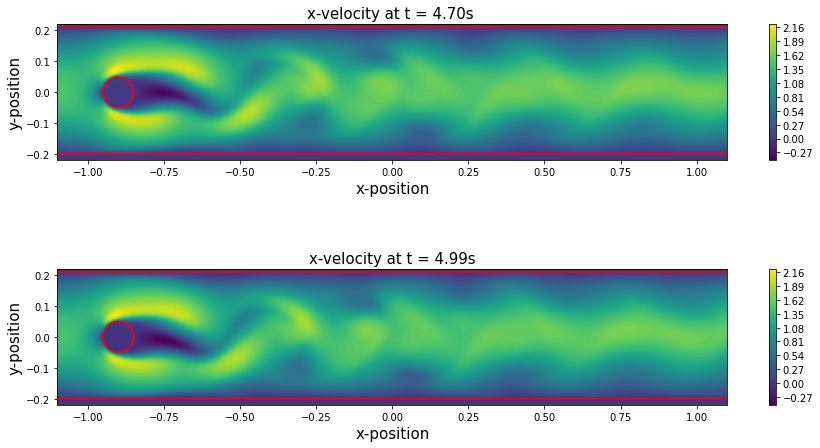

In [ ]:
x, y = np.meshgrid(np.linspace(-1.1, 1.1, 401), np.linspace(-0.22, 0.22, 81))
fig, axs = plt.subplots(2, 1, figsize=(15, 7))

axs_0_0 = axs[0].tricontourf(x.flatten(), y.flatten() , ux_o[:, :, 470].flatten(), 100)
fig.colorbar(axs_0_0, ax=axs[0])
axs[0].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

axs_0_1 = axs[1].tricontourf(x.flatten(), y.flatten() , ux_o[:, :, 499].flatten(), 100)
fig.colorbar(axs_0_0, ax=axs[1])
axs[1].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

fig.subplots_adjust(hspace = 0.8)

axs[0].set_title('x-velocity at t = 4.70s ', size =15)
axs[1].set_title('x-velocity at t = 4.99s', size =15)

axs[0].set_xlabel('x-position', size =15)
axs[1].set_xlabel('x-position', size =15)

axs[0].set_ylabel('y-position', size =15)
axs[1].set_ylabel('y-position', size =15)

In [ ]:
ux_o = ux_o[:, :, 470:500]
uy_o = uy_o[:, :, 470:500]
p_o = p_o[:, :, 470:500]

np.shape(ux_o)

(81, 401, 30)

Text(0, 0.5, 'y-position')

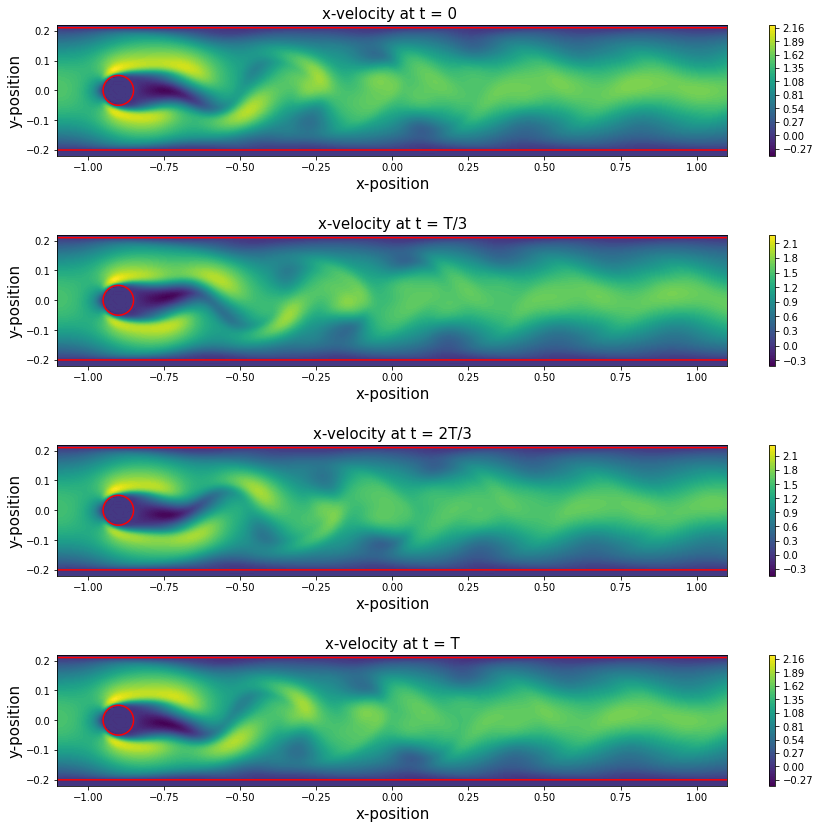

In [ ]:
x, y = np.meshgrid(np.linspace(-1.1, 1.1, 401), np.linspace(-0.22, 0.22, 81))

fig, axs = plt.subplots(4, 1, figsize=(15, 14))

axs_0_0 = axs[0].tricontourf(x.flatten(), y.flatten() , ux_o[:, :, 0].flatten(), 100)
fig.colorbar(axs_0_0, ax=axs[0])
axs[0].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

axs_1_0 = axs[1].tricontourf(x.flatten(), y.flatten() , ux_o[:, :, 9].flatten(), 100)
fig.colorbar(axs_1_0, ax=axs[1])
axs[1].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

axs_2_0 = axs[2].tricontourf(x.flatten(), y.flatten() , ux_o[:, :, 19].flatten(), 100)
fig.colorbar(axs_2_0, ax=axs[2])
axs[2].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

axs_3_0 = axs[3].tricontourf(x.flatten(), y.flatten() , ux_o[:, :, 29].flatten(), 100)
fig.colorbar(axs_3_0, ax=axs[3])
axs[3].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

fig.subplots_adjust(hspace = 0.6)

axs[0].set_title('x-velocity at t = 0 ', size =15)
axs[1].set_title('x-velocity at t = T/3', size =15)
axs[2].set_title('x-velocity at t = 2T/3', size =15)
axs[3].set_title('x-velocity at t = T', size =15)

axs[0].set_xlabel('x-position', size =15)
axs[1].set_xlabel('x-position', size =15)
axs[2].set_xlabel('x-position', size =15)
axs[3].set_xlabel('x-position', size =15)

axs[0].set_ylabel('y-position', size =15)
axs[1].set_ylabel('y-position', size =15)
axs[2].set_ylabel('y-position', size =15)
axs[3].set_ylabel('y-position', size =15)

Text(0, 0.5, 'y-position')

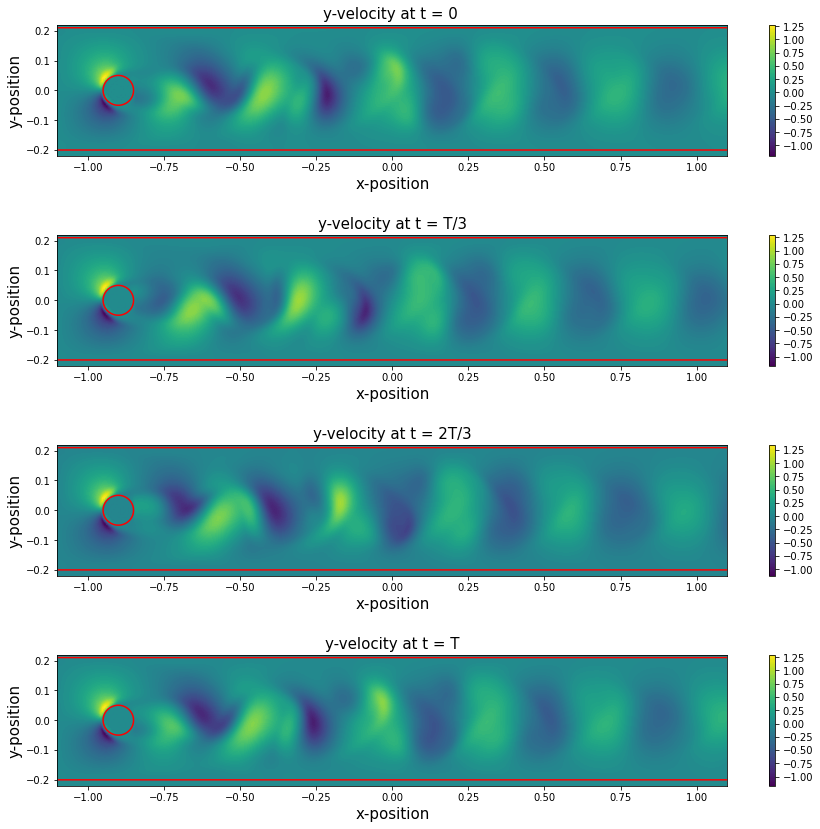

In [ ]:
x, y = np.meshgrid(np.linspace(-1.1, 1.1, 401), np.linspace(-0.22, 0.22, 81))

fig, axs = plt.subplots(4, 1, figsize=(15, 14))

axs_0_0 = axs[0].tricontourf(x.flatten(), y.flatten() , uy_o[:, :, 0].flatten(), 100)
fig.colorbar(axs_0_0, ax=axs[0])
axs[0].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

axs_1_0 = axs[1].tricontourf(x.flatten(), y.flatten() , uy_o[:, :, 9].flatten(), 100)
fig.colorbar(axs_1_0, ax=axs[1])
axs[1].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

axs_2_0 = axs[2].tricontourf(x.flatten(), y.flatten() , uy_o[:, :, 19].flatten(), 100)
fig.colorbar(axs_2_0, ax=axs[2])
axs[2].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

axs_3_0 = axs[3].tricontourf(x.flatten(), y.flatten() , uy_o[:, :, 29].flatten(), 100)
fig.colorbar(axs_3_0, ax=axs[3])
axs[3].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

fig.subplots_adjust(hspace = 0.6)

axs[0].set_title('y-velocity at t = 0 ', size =15)
axs[1].set_title('y-velocity at t = T/3', size =15)
axs[2].set_title('y-velocity at t = 2T/3', size =15)
axs[3].set_title('y-velocity at t = T', size =15)

axs[0].set_xlabel('x-position', size =15)
axs[1].set_xlabel('x-position', size =15)
axs[2].set_xlabel('x-position', size =15)
axs[3].set_xlabel('x-position', size =15)

axs[0].set_ylabel('y-position', size =15)
axs[1].set_ylabel('y-position', size =15)
axs[2].set_ylabel('y-position', size =15)
axs[3].set_ylabel('y-position', size =15)

Text(0, 0.5, 'y-position')

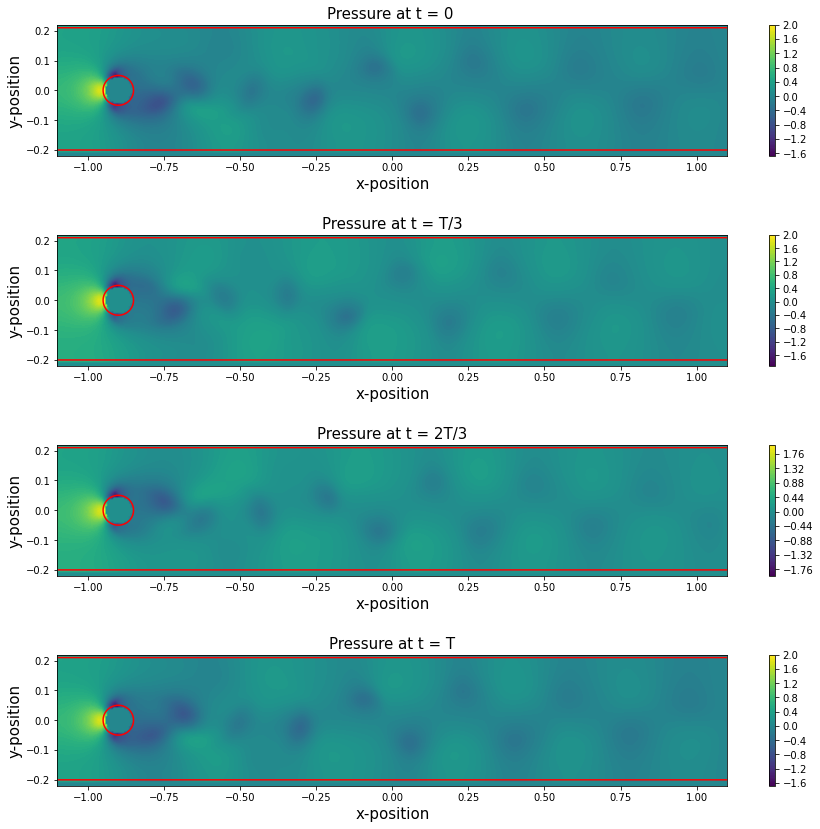

In [ ]:
x, y = np.meshgrid(np.linspace(-1.1, 1.1, 401), np.linspace(-0.22, 0.22, 81))

fig, axs = plt.subplots(4, 1, figsize=(15, 14))

axs_0_0 = axs[0].tricontourf(x.flatten(), y.flatten() , p_o[:, :, 0].flatten(), 100)
fig.colorbar(axs_0_0, ax=axs[0])
axs[0].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

axs_1_0 = axs[1].tricontourf(x.flatten(), y.flatten() , p_o[:, :, 9].flatten(), 100)
fig.colorbar(axs_1_0, ax=axs[1])
axs[1].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

axs_2_0 = axs[2].tricontourf(x.flatten(), y.flatten() , p_o[:, :, 19].flatten(), 100)
fig.colorbar(axs_2_0, ax=axs[2])
axs[2].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

axs_3_0 = axs[3].tricontourf(x.flatten(), y.flatten() , p_o[:, :, 29].flatten(), 100)
fig.colorbar(axs_3_0, ax=axs[3])
axs[3].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

fig.subplots_adjust(hspace = 0.6)

axs[0].set_title('Pressure at t = 0 ', size =15)
axs[1].set_title('Pressure at t = T/3', size =15)
axs[2].set_title('Pressure at t = 2T/3', size =15)
axs[3].set_title('Pressure at t = T', size =15)

axs[0].set_xlabel('x-position', size =15)
axs[1].set_xlabel('x-position', size =15)
axs[2].set_xlabel('x-position', size =15)
axs[3].set_xlabel('x-position', size =15)

axs[0].set_ylabel('y-position', size =15)
axs[1].set_ylabel('y-position', size =15)
axs[2].set_ylabel('y-position', size =15)
axs[3].set_ylabel('y-position', size =15)

In [ ]:
x = np.linspace(-1.1, 1.1, 400)
y = np.linspace(-0.22, 0.22, 80)
t = np.linspace(0, 0.29, 30)

xx, yy, tt = np.meshgrid(x, y, t)

ux = np.zeros((len(y), len(x), len(t)))
uy = np.zeros((len(y), len(x), len(t)))
p = np.zeros((len(y), len(x), len(t)))

for n in tqdm(range(30)):
  f_x_velocity = interpolate.RectBivariateSpline(np.linspace(-0.22, 0.22, 81), np.linspace(-1.1, 1.1, 401), ux_o[:, :, n])
  f_y_velocity = interpolate.RectBivariateSpline(np.linspace(-0.22, 0.22, 81), np.linspace(-1.1, 1.1, 401), uy_o[:, :, n])
  f_p = interpolate.RectBivariateSpline(np.linspace(-0.22, 0.22, 81), np.linspace(-1.1, 1.1, 401), p_o[:, :, n])
  
  for i in range(len(y)):
        for j in range(len(x)):
            ux[i, j, n] = f_x_velocity(yy[i, j, n], xx[i, j, n])
            uy[i, j, n] = f_y_velocity(yy[i, j, n], xx[i, j, n])
            p[i, j, n] = f_p(yy[i, j, n], xx[i, j, n])

Text(0, 0.5, 'y-position')

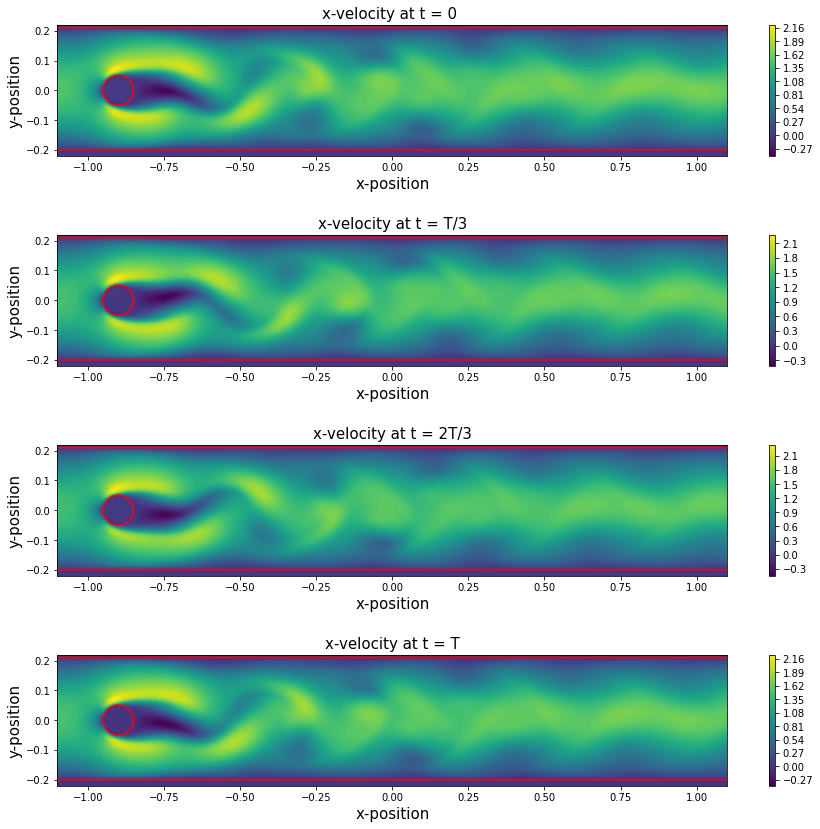

In [ ]:
x, y = np.meshgrid(np.linspace(-1.1, 1.1, 400), np.linspace(-0.22, 0.22, 80))

fig, axs = plt.subplots(4, 1, figsize=(15, 14))

axs_0_0 = axs[0].tricontourf(x.flatten(), y.flatten() , ux[:, :, 0].flatten(), 100)
fig.colorbar(axs_0_0, ax=axs[0])
axs[0].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

axs_1_0 = axs[1].tricontourf(x.flatten(), y.flatten() , ux[:, :, 9].flatten(), 100)
fig.colorbar(axs_1_0, ax=axs[1])
axs[1].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

axs_2_0 = axs[2].tricontourf(x.flatten(), y.flatten() , ux[:, :, 19].flatten(), 100)
fig.colorbar(axs_2_0, ax=axs[2])
axs[2].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

axs_3_0 = axs[3].tricontourf(x.flatten(), y.flatten() , ux[:, :, 29].flatten(), 100)
fig.colorbar(axs_3_0, ax=axs[3])
axs[3].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

fig.subplots_adjust(hspace = 0.6)

axs[0].set_title('x-velocity at t = 0 ', size =15)
axs[1].set_title('x-velocity at t = T/3', size =15)
axs[2].set_title('x-velocity at t = 2T/3', size =15)
axs[3].set_title('x-velocity at t = T', size =15)

axs[0].set_xlabel('x-position', size =15)
axs[1].set_xlabel('x-position', size =15)
axs[2].set_xlabel('x-position', size =15)
axs[3].set_xlabel('x-position', size =15)

axs[0].set_ylabel('y-position', size =15)
axs[1].set_ylabel('y-position', size =15)
axs[2].set_ylabel('y-position', size =15)
axs[3].set_ylabel('y-position', size =15)

Text(0, 0.5, 'y-position')

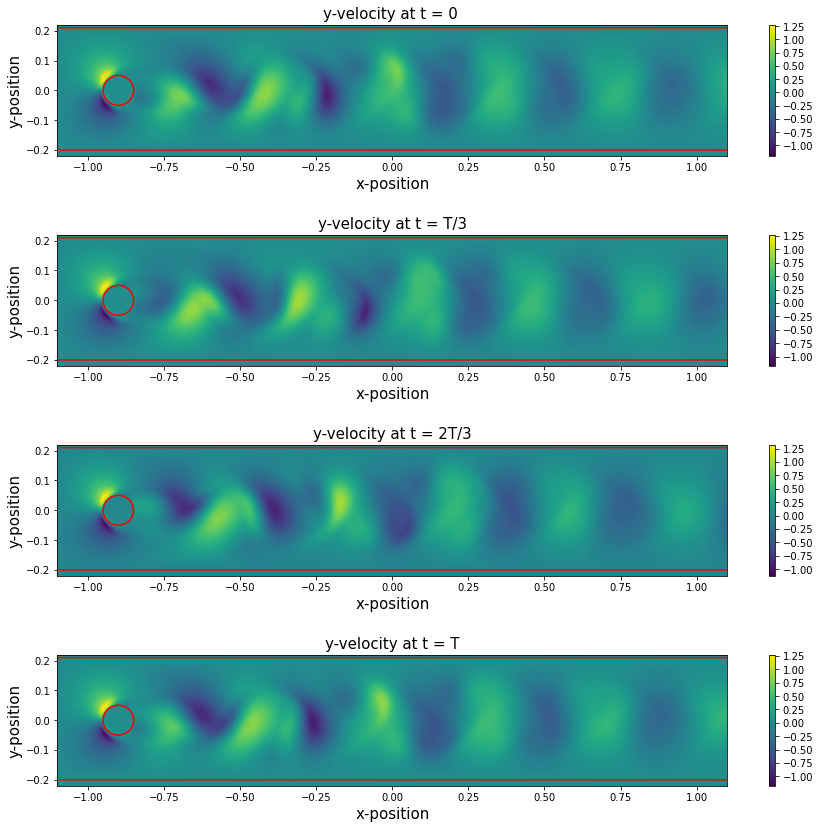

In [ ]:
x, y = np.meshgrid(np.linspace(-1.1, 1.1, 400), np.linspace(-0.22, 0.22, 80))

fig, axs = plt.subplots(4, 1, figsize=(15, 14))

axs_0_0 = axs[0].tricontourf(x.flatten(), y.flatten() , uy[:, :, 0].flatten(), 100)
fig.colorbar(axs_0_0, ax=axs[0])
axs[0].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

axs_1_0 = axs[1].tricontourf(x.flatten(), y.flatten() , uy[:, :, 9].flatten(), 100)
fig.colorbar(axs_1_0, ax=axs[1])
axs[1].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

axs_2_0 = axs[2].tricontourf(x.flatten(), y.flatten() , uy[:, :, 19].flatten(), 100)
fig.colorbar(axs_2_0, ax=axs[2])
axs[2].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

axs_3_0 = axs[3].tricontourf(x.flatten(), y.flatten() , uy[:, :, 29].flatten(), 100)
fig.colorbar(axs_3_0, ax=axs[3])
axs[3].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

fig.subplots_adjust(hspace = 0.6)

axs[0].set_title('y-velocity at t = 0 ', size =15)
axs[1].set_title('y-velocity at t = T/3', size =15)
axs[2].set_title('y-velocity at t = 2T/3', size =15)
axs[3].set_title('y-velocity at t = T', size =15)

axs[0].set_xlabel('x-position', size =15)
axs[1].set_xlabel('x-position', size =15)
axs[2].set_xlabel('x-position', size =15)
axs[3].set_xlabel('x-position', size =15)

axs[0].set_ylabel('y-position', size =15)
axs[1].set_ylabel('y-position', size =15)
axs[2].set_ylabel('y-position', size =15)
axs[3].set_ylabel('y-position', size =15)

Text(0, 0.5, 'y-position')

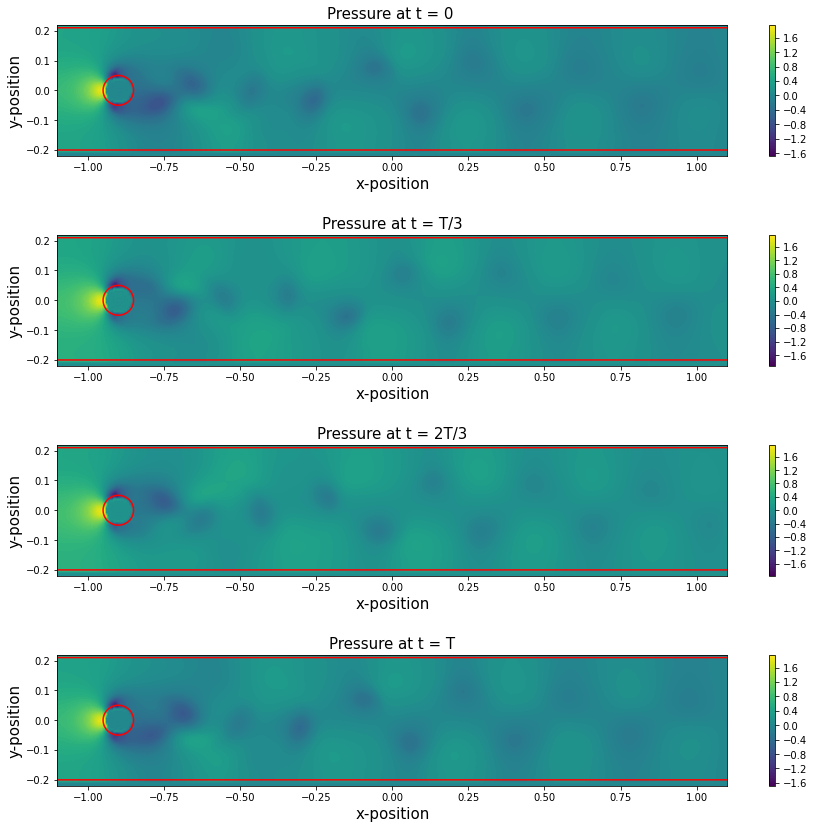

In [ ]:
x, y = np.meshgrid(np.linspace(-1.1, 1.1, 400), np.linspace(-0.22, 0.22, 80))

fig, axs = plt.subplots(4, 1, figsize=(15, 14))

axs_0_0 = axs[0].tricontourf(x.flatten(), y.flatten() , p[:, :, 0].flatten(), 100)
fig.colorbar(axs_0_0, ax=axs[0])
axs[0].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

axs_1_0 = axs[1].tricontourf(x.flatten(), y.flatten() , p[:, :, 9].flatten(), 100)
fig.colorbar(axs_1_0, ax=axs[1])
axs[1].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

axs_2_0 = axs[2].tricontourf(x.flatten(), y.flatten() , p[:, :, 19].flatten(), 100)
fig.colorbar(axs_2_0, ax=axs[2])
axs[2].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

axs_3_0 = axs[3].tricontourf(x.flatten(), y.flatten() , p[:, :, 29].flatten(), 100)
fig.colorbar(axs_3_0, ax=axs[3])
axs[3].contour(x_dom,y_dom,phi,levels=[0.], colors = 'red')

fig.subplots_adjust(hspace = 0.6)

axs[0].set_title('Pressure at t = 0 ', size =15)
axs[1].set_title('Pressure at t = T/3', size =15)
axs[2].set_title('Pressure at t = 2T/3', size =15)
axs[3].set_title('Pressure at t = T', size =15)

axs[0].set_xlabel('x-position', size =15)
axs[1].set_xlabel('x-position', size =15)
axs[2].set_xlabel('x-position', size =15)
axs[3].set_xlabel('x-position', size =15)

axs[0].set_ylabel('y-position', size =15)
axs[1].set_ylabel('y-position', size =15)
axs[2].set_ylabel('y-position', size =15)
axs[3].set_ylabel('y-position', size =15)

In [ ]:
np.save('/content/gdrive/My Drive/2D_UNSTEADY_NSTOKES/ux.npy',ux, allow_pickle=True)
np.save('/content/gdrive/My Drive/2D_UNSTEADY_NSTOKES/uy.npy',uy, allow_pickle=True)
np.save('/content/gdrive/My Drive/2D_UNSTEADY_NSTOKES/p.npy', p, allow_pickle=True)